Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib
import time
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

Define Paths to Folders

In [ ]:
train_folder = '/content/drive/MyDrive/Data Science Bootcamp Resources /Week 06/Day 05 - GUI Application for MRI Image Tumor Detection/mri_dataset/Training'
test_folder = '/content/drive/MyDrive/Data Science Bootcamp Resources /Week 06/Day 05 - GUI Application for MRI Image Tumor Detection/mri_dataset/Testing'
IMAGE_SIZE = 20
CATEGORIES = os.listdir(train_folder)
print(CATEGORIES)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


Loading Training Dataset

In [3]:
train_data = []
def create_train_data():
  for category in CATEGORIES:
    path = os.path.join(train_folder, category)
    label = CATEGORIES.index(category)
    for img in tqdm(os.listdir(path)):
      try:
        image_array = cv2.imread(os.path.join(path, img))
        reshaped_array = cv2.resize(image_array, (IMAGE_SIZE, IMAGE_SIZE))
        train_data.append([reshaped_array, label])
      except Exception as e:
        pass

In [4]:
create_train_data()

100%|██████████| 827/827 [00:18<00:00, 45.44it/s] 


In [5]:
test_data = []
def create_test_data():
  for category in CATEGORIES:
    path = os.path.join(test_folder, category)
    label = CATEGORIES.index(category)
    for img in tqdm(os.listdir(path)):
      try:
        image_array = cv2.imread(os.path.join(path, img))
        reshaped_array = cv2.resize(image_array, (IMAGE_SIZE, IMAGE_SIZE))
        test_data.append([reshaped_array, label])
      except Exception as e:
        pass

In [ ]:
create_test_data()

100%|██████████| 74/74 [01:06<00:00,  1.11it/s]


In [ ]:
print(np.shape(train_data), type(train_data))
print(np.shape(test_data), type(test_data))

(2870, 2) <class 'list'>
(394, 2) <class 'list'>


In [ ]:
data = train_data+test_data
print(np.shape(data))

(3264, 2)


In [ ]:
# data = np.array(data)
# print('Data: ', data.shape, type(data))

In [ ]:
# train_data = np.array(train_data)
# test_data = np.array(test_data)

# print('Train Data: ',train_data.shape, type(train_data))
# print('Test Data: ', test_data.shape, type(test_data))

In [ ]:
X = []
y = []
for features,label in tqdm(data):
  X.append(features)
  y.append(label)

100%|██████████| 3264/3264 [00:00<00:00, 1293848.24it/s]


In [ ]:
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)
type(X), type(y)

(3264, 20, 20, 3) (3264,)


(numpy.ndarray, numpy.ndarray)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Building The CNN Model Architecture

In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, Flatten, Activation, Dropout


def create_cnn_model():
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(filters = 64, kernel_size = (5, 5), padding = 'Same', activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2)))

    model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = 'Same', activation='relu'))
    model.add(MaxPooling2D((2, 2), strides = (2,2)))

    # model.add(Conv2D(filters = 196, kernel_size = (3, 3), padding = 'Same', activation='relu'))
    # model.add(MaxPooling2D((2, 2), strides = (2,2)))

    # model.add(Conv2D(filters = 328, kernel_size = (3, 3), padding = 'Same', activation='relu'))
    # model.add(MaxPooling2D((2, 2), strides = (2,2)))

    # model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = 'Same', activation='relu'))
    # model.add(MaxPooling2D((2, 2), strides = (2,2)))

    # model.add(Conv2D(filters = 912, kernel_size = (3, 3), padding = 'Same', activation='relu'))
    # model.add(MaxPooling2D((2, 2), strides = (2,2)))


    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
    model.add(Dense(4, activation='softmax'))

    return model


Compiling the CNN Model

In [ ]:
# Create the model
cnn_model = create_cnn_model()

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoded labels
                  metrics=['accuracy'])

# Print model summary
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 20, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 512)               1

Training the Model

In [ ]:
start_time = time.time()
history = cnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))
end_time = time.time()

Epoch 1/50
77/77 [==============================] - 18s 49ms/step - loss: 43.8750 - accuracy: 0.5833 - val_loss: 0.7743 - val_accuracy: 0.7255
Epoch 2/50
77/77 [==============================] - 3s 41ms/step - loss: 0.6100 - accuracy: 0.7806 - val_loss: 0.6037 - val_accuracy: 0.7904
Epoch 3/50
77/77 [==============================] - 3s 39ms/step - loss: 0.4775 - accuracy: 0.8288 - val_loss: 0.5916 - val_accuracy: 0.7966
Epoch 4/50
77/77 [==============================] - 3s 41ms/step - loss: 0.3674 - accuracy: 0.8824 - val_loss: 0.5260 - val_accuracy: 0.8346
Epoch 5/50
77/77 [==============================] - 3s 41ms/step - loss: 0.2695 - accuracy: 0.9069 - val_loss: 0.5642 - val_accuracy: 0.8419
Epoch 6/50
77/77 [==============================] - 3s 40ms/step - loss: 0.1626 - accuracy: 0.9449 - val_loss: 0.5220 - val_accuracy: 0.8750
Epoch 7/50
77/77 [==============================] - 3s 40ms/step - loss: 0.1077 - accuracy: 0.9624 - val_loss: 0.5755 - val_accuracy: 0.8542
Epoch 8/50


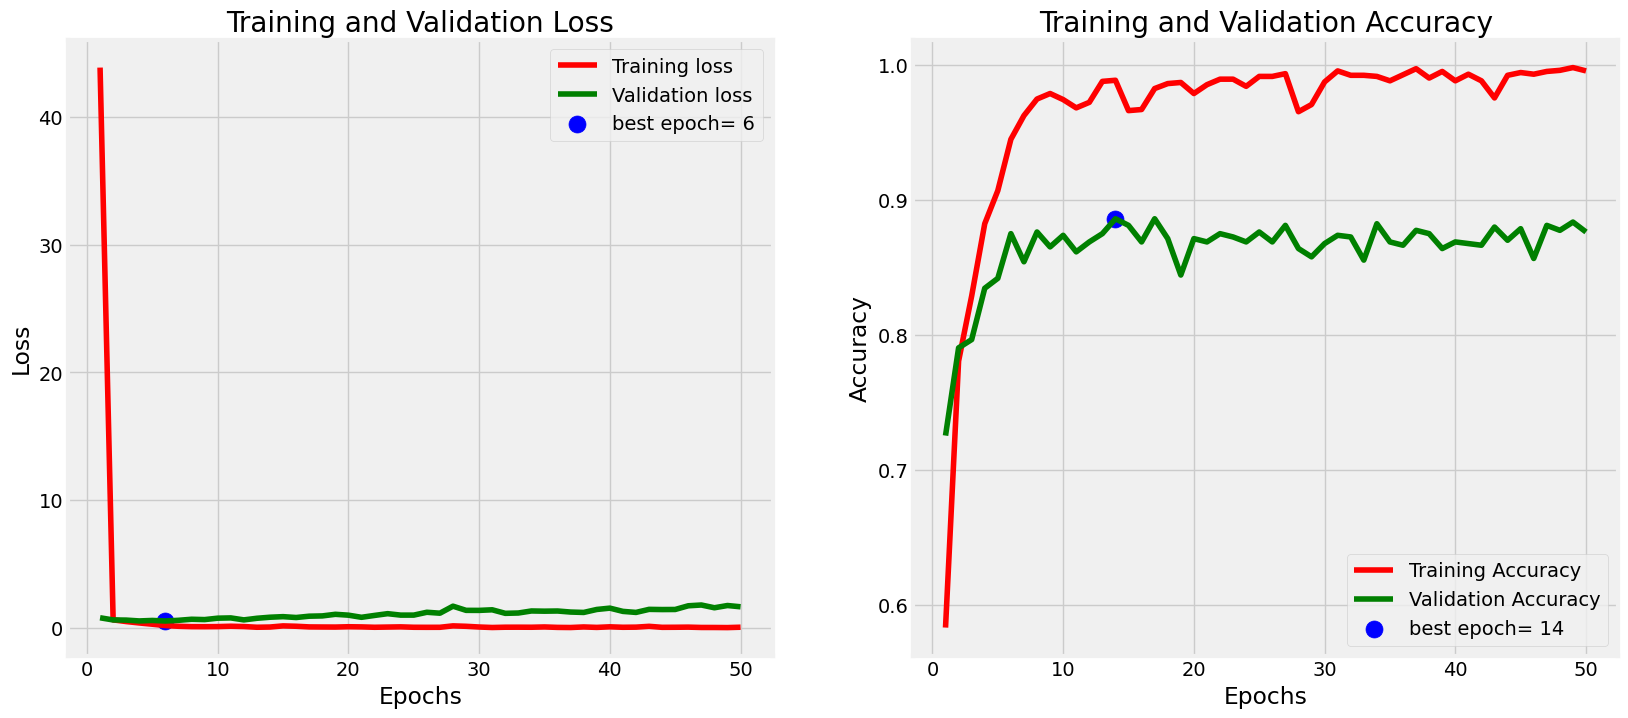

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
#Save the model
cnn_model.save('/content/drive/MyDrive/Data Science Bootcamp Resources /Week 06/Day 05 - GUI Application for MRI Image Tumor Detection/BrainTumor.h5')